# Problem setting: Recognizing hand-written digits.

Recognizing hand-written digits is a classification problem, in which the aim is to assign each input vector to one of a finite number of discrete categories, to learn observed data points from already labeled data how to predict the class of unlabeled data. In the usecase of hand-written digits dataset, the task is to predict, given an image, which digit it represents.

Training model learn features of each number between 0 and 9. The model will be given samples of each of the 10 possible classes on which we fit an estimator to be able to predict the classes to which unseen samples belong.

## Problem solution: Supervised learning and predicting

In this simple problem, there can be no need to implement deep neural network. For the purpose of convenience, we use a simple algorithm as the estimator. An example of the estimator is the class [sklearn.neural_network.MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn-neural-network-mlpclassifier) that implements Multi-layer Perceptron classifier. The constructor of an estimator takes as arguments the parameters of the model, but for the time being, we will consider the estimator as a black box.

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.neural_network import MLPClassifier

/usr/local/bin/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Classification report for classifier MLPClassifier(activation='relu', alpha=1e-05, batch_size=100, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000,), learning_rate='constant',
       learning_rate_init=1e-05, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False):
             precision    recall  f1-score   support

          0       0.98      0.95      0.97        88
          1       0.91      0.82      0.87        91
          2       0.96      0.88      0.92        86
          3       0.88      0.82      0.85        91
          4       0.97      0.93      0.95        92
          5       0.80      0.90      0.85        91
          6       0.95      1.00      0.97        91
          7       0.95      0.97      0.96        89
          8       0.88      0.80      0.83        88


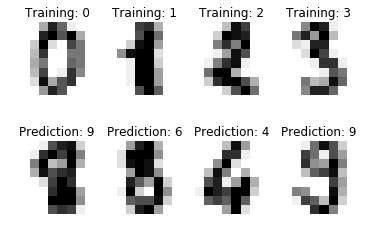

In [2]:
from sklearn.neural_network import MLPClassifier

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

classifier = MLPClassifier(
    # Activation function in the hidden layer.
    activation="relu",
    # L2 penalty (regularization term) parameter.
    alpha=0.00001,
    # Bath size.
    batch_size=100,
    # The ith element represents the number of neurons in the ith hidden layer.
    hidden_layer_sizes=(1000,), 
    # The initial learning rate used.
    learning_rate_init=0.00001,
    # Maximum number of iterations.
    max_iter=100,
    # Solver.
    solver="adam",
    shuffle=True,
    verbose=False
)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()
plt.close()

# Issue: Complexity of Hyperparameters, or how can be hyperparameters decided? 

There are many hyperparameters that we have to set before the actual training process begins. Each parameter should be decided in relation to machine learning theory and it cause side effects in training model. Because of this complexity of hyperparameters, so-called the *hyperparameter tuning* must become a burden of Data scientists and R & D engineers from the perspective of not only a theoretical point of view but also implementation level.

# Problem re-setting: Combinatorial optimization problem.

This issue can be considered as Combinatorial optimization problem which is an optimization problem, where an optimal solution has to be identified from a finite set of solutions. The solutions are normally discrete or can be converted into discrete. This is an important topic studied in operations research such as software engineering, artificial intelligence(AI), and machine learning. For instance, travelling sales man problem is one of the popular combinatorial optimization problem.

Considering that the *hyperparameter tuning* can be formed into Combinatorial optimization problem, the optimal solution to be searched is estimation accuracy, precision, recall, or F-value and so on. Conversely, estimation error such as Mean Squared Error(MSE), Root Mean Squared Error(RMSE), or Mean Absolute Error(MAE) can be a value of penalty, which must be reduced by searching and learning.

In this problem setting, combination of the hyperparameters are explanatory variables for the optimal solution. Each parameter can be generated from random sampling like Monte Carlo method.

## Problem solution: Simulated Annealing.

Simulated Annealing is a probabilistic single solution based search method inspired by the annealing process in metallurgy. Annealing is a physical process referred to as tempering certain alloys of metal, glass, or crystal by heating above its melting point, holding its temperature, and then cooling it very slowly until it solidifies into a perfect crystalline structure. The simulation of this process is known as simulated annealing. 

### Conceptual perspective.

The simulated annealing is a generic algorithm. Combinatorial optimization is an one of the various functions of simulated annealing. 

#### Boltzmann distribution.

According to statistical mechanics and thermodynamics, $P_{\alpha}$, the probability of a physical system
being in state $\alpha$ with energy $E_{\alpha}$ at absolute temperature $T$ satisfies the Boltzmann distribution as follow.

$$P_{\alpha} = \frac{1}{Z}e^{\frac{E_{\alpha}}{k_{B}}}T$$

where $k_{B}$ is the Boltzmann’s constant and $Z$ is the partition function, defined by

$$Z = \sum_{\beta}^{}e^{\frac{E_{\beta}}{k_{B}}}T$$

#### Meaning of partition function.

To simplify, this partition function can be considered as the summation being taken over all states $\alpha = \{0, 1, ..., \beta \}$ with energy $E_{\alpha}$ at temperature $T$ . At high $T$ , the Boltzmann distribution exhibits uniform preference for all the states, regardless of the energy. The system ignores small changes in
the energy and approaches thermal equilibrium rapidly. On the other hand, when $T$ approaches zero or very low, only the states with minimum energy have non-zero probability of occurrence. The system can respond to small changes in the energy.

#### To find a better minimum

According to statistical mechanics, gradually decreasing temperature corresponds to gradually decreasing information entropy. So this system can perform a fine search in the neighborhood of the already determined minimum and finds a better minimum.

#### Cost function

The function of Combinatorial optimization algorithm is minimization of the penalty that cost function returns. Typically, the cost function is defined by

$$f(p_k, y_k) = Loss_{MSE} =\frac{1}{n}\sum_{k=1}^n(p_k - y_k)^2$$

where $p_k$ is a set of predicted labels and $y_k$ is a set of correct labels.

### Specification perspective.

There are various Simulated Annealing such as Boltzmann Annealing, Adaptive Simulated Annealing(SAS), and Quantum Simulated Annealing. On the premise of Combinatorial optimization problem, these annealing methods can be considered as functionally equivalent. The *Commonality/Variability* in these methods are able to keep responsibility of objects all straight as the class diagram below indicates.

![img/class_diagram_annealing_model.png](img/class_diagram_annealing_model.png)

An abstract class `AnnealingModel` is responsible for common annealing methods. And a concrete class `SimulatedAnnealing` is-a `AnnealingModel` to behave as Simulated Annealing. `CostFunctionable` is an interface which performs as cost function. Implementation of this interface depends on user's problem settings.

### Implementation perspective.

In order to implement `CostFunctionable` and use `AnnealingModel` in this problem setting, let us adhere fundamentally to an introduction with scikit-learn.

- [An introduction to machine learning with scikit-learn — scikit-learn 0.19.1 documentation](http://scikit-learn.org/stable/tutorial/basic/tutorial.html)

#### Dataset.

The data that we are interested in is made of 8x8 images of digits, let's have a look at the first 4 images, stored in the `images` attribute of the dataset.  If we were working from image files, we could load them using matplotlib.pyplot.imread.  Note that each image must have the same size. For these images, we know which digit they represent: it is given in the 'target' of the dataset.

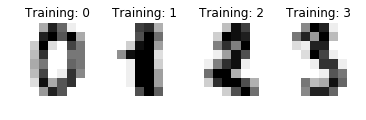

In [3]:
# The digits dataset
digits = datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

#### Implement cost function.

Let us implement `CostFunctionable` as follow.

In [4]:
from pyqlearning.annealingmodel.simulated_annealing import SimulatedAnnealing
from pyqlearning.annealingmodel.cost_functionable import CostFunctionable
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [5]:
class DigitClfCost(CostFunctionable):
    '''
    is-a `CostFunctionable` in relation to `SimulatedAnnealing`.
    '''

    # The list of activation function in the hidden layer.
    __activation_list = ["relu", "logistic", "tanh"]
    # The solver for weight optimization.
    __solver_list = ["lbfgs", "sgd", "adam"]
    
    def compute(self, x):
        '''
        Compute cost.
        
        Args:
            x:    `np.ndarray` of explanatory variables.
        
        Returns:
            cost
        '''
        classifier = MLPClassifier(
            # Activation function in the hidden layer.
            activation=self.__activation_list[int(x[0])],
            # L2 penalty (regularization term) parameter.
            alpha=x[1],
            # Bath size.
            batch_size=int(x[2]),
            # The ith element represents the number of neurons in the ith hidden layer.
            hidden_layer_sizes=(int(x[3]),), 
            # The initial learning rate used.
            learning_rate_init=x[4],
            # Maximum number of iterations.
            max_iter=int(x[5]),
            # Solver.
            solver=self.__solver_list[int(x[6])],
            shuffle=True,
            verbose=False
        )

        # We learn the digits on the first half of the digits
        classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

        # Now predict the value of the digit on the second half:
        expected = digits.target[n_samples // 2:]
        predicted = classifier.predict(data[n_samples // 2:])
        
        cost = mean_squared_error(expected, predicted)
        
        return cost

    def get_activation_list(self):
        return self.__activation_list

    def get_solver_list(self):
        return self.__solver_list

    def set_readonly(self, value):
        raise TypeError()

    activation_list = property(get_activation_list, set_readonly)
    solver_list = property(get_solver_list, set_readonly)

#### Sampling hyperparameters.

Like Monte Carlo method, let us draw random samples from a normal (Gaussian) or unifrom distribution.

In [9]:
activation_arr = np.random.uniform(low=0, high=1, size=1000)
alpha_arr = np.random.normal(loc=0.0001, scale=0.00001, size=1000)
batch_size_arr = np.random.normal(loc=200, scale=10, size=1000).astype(int)
hidden_arr = np.random.normal(loc=1000, scale=100, size=1000).astype(int)
learning_rate_arr = np.random.normal(loc=0.01, scale=0.0005, size=1000)
max_iter_arr = np.random.normal(loc=1000, scale=200, size=1000)
solver_arr = np.random.uniform(low=0, high=1, size=1000)

cost_arr = np.c_[
    activation_arr,
    alpha_arr,
    batch_size_arr,
    hidden_arr,
    learning_rate_arr,
    max_iter_arr,
    solver_arr
]

#### Use `AnnealingModel`.

Instantiate `DigitClfCost` and delegate it to `SimulatedAnnealing.__init__()`. Then call the method `fit_dist_mat` to fit the combination of hyperparameters. Finally, call the method `annealing`.

In [ ]:
cost_functionable = DigitClfCost()
annealing_model = SimulatedAnnealing(
    cost_functionable=cost_functionable,
    cycles_num=33,
    trials_per_cycle=3,
    accepted_sol_num=0.0,
    init_prob=0.7,
    final_prob=0.001,
    start_pos=0,
    move_range=3
)
annealing_model.fit_dist_mat(cost_arr)
annealing_model.annealing()

#### Get and plot result data.

As shown by the figure below, the energy has been decreasing gradually.

In [ ]:
# Extract list: [(Cost, Delta energy, Mean of delta energy, probability, accept)]
predicted_log_list = annealing_model.predicted_log_list
predicted_log_arr = np.array(predicted_log_list)

#### Get and plot result data.

As shown by the figure below, the energy has been decreasing gradually.

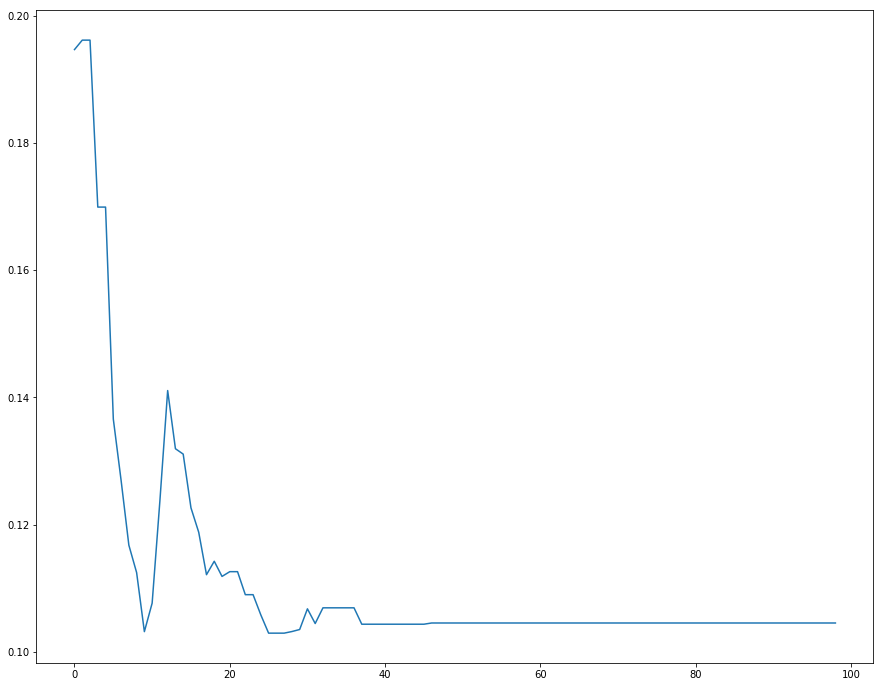

In [9]:
# Plot delta_e_avg
fig = plt.figure(figsize=(15, 12))
plt.plot(predicted_log_arr[:, 2])
plt.show()
plt.close()

#### Dicide optimal solution

The optimal combination of hyperparameters can be confirmed as follow.

In [10]:
min_e_v_arr = annealing_model.x[np.argmin(predicted_log_arr[:, 2])]

activation = cost_functionable.activation_list[int(min_e_v_arr[0])]
alpha = min_e_v_arr[1]
batch_size = int(min_e_v_arr[2])
hidden_n = int(min_e_v_arr[3])
learning_rate_init = min_e_v_arr[4]
max_iter = int(min_e_v_arr[5])
solver = cost_functionable.solver_list[int(min_e_v_arr[6])]

print("Activation: " + str(activation))
print("Alpha: " + str(alpha))
print("Batch size: " + str(batch_size))
print("The number of units in hidden layer: " + str(hidden_n))
print("Init of Learning rate: " + str(learning_rate_init))
print("Max iter: " + str(max_iter))
print("Solver: " + str(solver))

Activation: relu
Alpha: 0.000103667179416
Batch size: 189
The number of units in hidden layer: 928
Init of Learning rate: 0.0102094393941
Max iter: 1155
Solver: lbfgs


#### Training by optimal hyperparameters.

Then this optimal solution makes it possible for machine learning model to learn by optimal hyperparameters.

Classification report for classifier MLPClassifier(activation='relu', alpha=0.00010366717941587721, batch_size=189,
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(928,), learning_rate='constant',
       learning_rate_init=0.010209439394074748, max_iter=1155,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False):
             precision    recall  f1-score   support

          0       0.99      0.94      0.97        88
          1       0.92      0.90      0.91        91
          2       0.99      1.00      0.99        86
          3       0.97      0.85      0.91        91
          4       0.96      0.89      0.93        92
          5       0.89      0.93      0.91        91
          6       0.89      0.98      0.93        91
          7       0.97      0.97      0.97        89
          8       0.

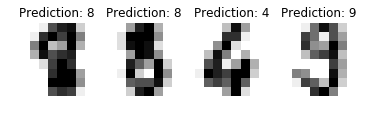

In [13]:
classifier = MLPClassifier(
    # Activation function in the hidden layer.
    activation=activation,
    # L2 penalty (regularization term) parameter.
    alpha=alpha,
    # Bath size.
    batch_size=batch_size,
    # The ith element represents the number of neurons in the ith hidden layer.
    hidden_layer_sizes=(hidden_n,), 
    # The initial learning rate used.
    learning_rate_init=learning_rate_init,
    # Maximum number of iterations.
    max_iter=max_iter,
    # Solver.
    solver=solver,
    shuffle=True,
    verbose=False
)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

## Functional equivalent: Adaptive Simulated Annealing.

Adaptive simulated annealing, also known as the very fast simulated reannealing, is a very efficient version of simulated annealing.

In [11]:
from pyqlearning.annealingmodel.simulatedannealing.adaptive_simulated_annealing import AdaptiveSimulatedAnnealing

cost_functionable = DigitClfCost()
annealing_model = AdaptiveSimulatedAnnealing(
    cost_functionable=cost_functionable,
    cycles_num=33,
    trials_per_cycle=3,
    accepted_sol_num=0.0,
    init_prob=0.7,
    final_prob=0.001,
    start_pos=0,
    move_range=3
)
annealing_model.fit_dist_mat(cost_arr)
annealing_model.annealing()

/media/removable/rum/accel-brain-code/Reinforcement-Learning/pyqlearning/annealing_model.py:57: FutureWarning: This method will be removed in future versions. Please use setter/getter: `var_arr`.
  FutureWarning


In [12]:
# Extract list: [(Cost, Delta energy, Mean of delta energy, probability, accept)]
predicted_log_list = annealing_model.predicted_log_list
predicted_log_arr = np.array(predicted_log_list)

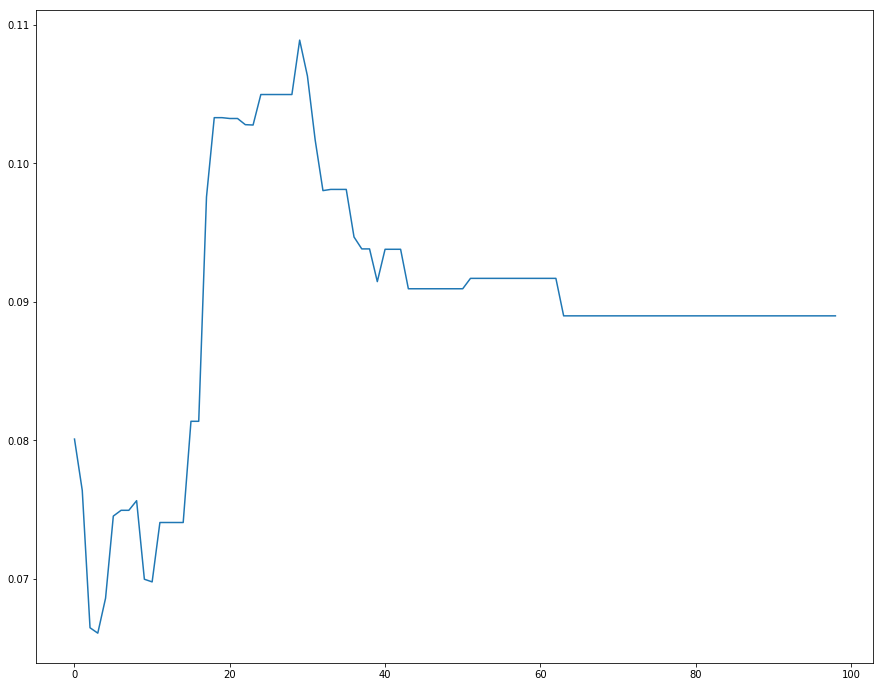

In [13]:
# Plot delta_e_avg
fig = plt.figure(figsize=(15, 12))
plt.plot(predicted_log_arr[:, 2])
plt.show()
plt.close()

#### Dicide optimal solution

The optimal combination of hyperparameters can be confirmed as follow.

In [15]:
min_e_v_arr = annealing_model.x[np.argmin(predicted_log_arr[:, 2])]

activation = cost_functionable.activation_list[int(min_e_v_arr[0])]
alpha = min_e_v_arr[1]
batch_size = int(min_e_v_arr[2])
hidden_n = int(min_e_v_arr[3])
learning_rate_init = min_e_v_arr[4]
max_iter = int(min_e_v_arr[5])
solver = cost_functionable.solver_list[int(min_e_v_arr[6])]

print("Activation: " + str(activation))
print("Alpha: " + str(alpha))
print("Batch size: " + str(batch_size))
print("The number of units in hidden layer: " + str(hidden_n))
print("Init of Learning rate: " + str(learning_rate_init))
print("Max iter: " + str(max_iter))
print("Solver: " + str(solver))

Activation: relu
Alpha: 0.00010558037834
Batch size: 175
The number of units in hidden layer: 895
Init of Learning rate: 0.00986773435599
Max iter: 879
Solver: lbfgs


/media/removable/rum/accel-brain-code/Reinforcement-Learning/pyqlearning/annealing_model.py:81: FutureWarning: This property will be removed in future versions. Please use setter/getter: `searched_var_arr`.
  FutureWarning


#### Training by optimal hyperparameters.

Then this optimal solution makes it possible for machine learning model to learn by optimal hyperparameters.

Classification report for classifier MLPClassifier(activation='relu', alpha=0.00010558037833976993, batch_size=175,
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(895,), learning_rate='constant',
       learning_rate_init=0.0098677343559934998, max_iter=879,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False):
             precision    recall  f1-score   support

          0       0.99      0.97      0.98        88
          1       0.93      0.90      0.92        91
          2       0.99      1.00      0.99        86
          3       0.96      0.86      0.91        91
          4       0.98      0.89      0.93        92
          5       0.84      0.92      0.88        91
          6       0.89      0.99      0.94        91
          7       0.95      0.98      0.96        89
          8       0.

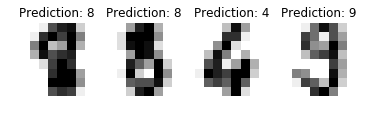

In [16]:
classifier = MLPClassifier(
    # Activation function in the hidden layer.
    activation=activation,
    # L2 penalty (regularization term) parameter.
    alpha=alpha,
    # Bath size.
    batch_size=batch_size,
    # The ith element represents the number of neurons in the ith hidden layer.
    hidden_layer_sizes=(hidden_n,), 
    # The initial learning rate used.
    learning_rate_init=learning_rate_init,
    # Maximum number of iterations.
    max_iter=max_iter,
    # Solver.
    solver=solver,
    shuffle=True,
    verbose=False
)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

### Comparison of accuracy.

As described above, it is backed by data such as precision, recall, f1-score, and support that training model in the case of using Simulated Annealing has a higher score than the model based on default hyperparameters.

#### In case of default hyperparameters.
```
         precision    recall  f1-score   support

          0       0.98      0.95      0.97        88
          1       0.91      0.82      0.87        91
          2       0.96      0.88      0.92        86
          3       0.88      0.82      0.85        91
          4       0.97      0.93      0.95        92
          5       0.80      0.90      0.85        91
          6       0.95      1.00      0.97        91
          7       0.95      0.97      0.96        89
          8       0.88      0.80      0.83        88
          9       0.74      0.87      0.80        92

avg / total       0.90      0.90      0.90       899
```

#### In case of using Simulated Annealing.

```
    precision    recall  f1-score   support

          0       0.99      0.94      0.97        88
          1       0.92      0.90      0.91        91
          2       0.99      1.00      0.99        86
          3       0.97      0.85      0.91        91
          4       0.96      0.89      0.93        92
          5       0.89      0.93      0.91        91
          6       0.89      0.98      0.93        91
          7       0.97      0.97      0.97        89
          8       0.90      0.89      0.89        88
          9       0.82      0.92      0.87        92

avg / total       0.93      0.93      0.93       899
```

### In case of using Adaptive Simulated Annealing.

```
    precision    recall  f1-score   support

          0       0.99      0.97      0.98        88
          1       0.93      0.90      0.92        91
          2       0.99      1.00      0.99        86
          3       0.96      0.86      0.91        91
          4       0.98      0.89      0.93        92
          5       0.84      0.92      0.88        91
          6       0.89      0.99      0.94        91
          7       0.95      0.98      0.96        89
          8       0.92      0.88      0.90        88
          9       0.86      0.90      0.88        92

avg / total       0.93      0.93      0.93       899
```


# Issue: Hyperparameters in order to tune hyperparameters.

The function of `AnnealingModel` is to tune hyperparameters. But this model itself requires to tune hyperparameters. Then how can be hyperparameters decided? Can `AnnealingModel` decide hyperparameters of `AnnealingModel` ? So the problem solution as described above can raise a paradox: *hyperparameters in order to tune hyperparameters in order to tune hyperparameters in order to tune hyperparameters...*.

It is not important for a mere end-user in the machine learning library to think that how can be this paradox *unfolded*. For instance, a kind of verification procedure such as so-called appeal from authority, in any case, makes it possible to *de-paradoxize* this issue. 

In spite of the fact, it is not necessary for us to follow expert advice and to trust primer's intuition about hyperparameter tuning blindly. According to modal logic, the relationship between algorithms and data structures in *your* problem setting can raise contingent result. Without customization, the machine learning library may well be of no practical use.

## Problem re-setting: Self-referential machine learning, or Autologie.

It is important for us to produce new PoC in relation to theory of *self-referential systems* so as to detoxify the paradox. The systems are a kind of machine learning models to interconnect, tuning their hyperparameters mutually. With the completion of those models, the machine learning model will be called Artificial intelligence(AI).

# References

- Du, K. L., & Swamy, M. N. S. (2016). Search and optimization by metaheuristics (p. 434). New York City: Springer.
- [量子力学、統計力学、熱力学における天才物理学者たちの神学的な形象について](https://accel-brain.com/das-theologische-bild-genialer-physiker-in-der-quantenmechanik-und-der-statistischen-mechanik-und-thermodynamik/) (Japanese)
- [An introduction to machine learning with scikit-learn &#8212; scikit-learn 0.19.1 documentation](http://scikit-learn.org/stable/tutorial/basic/tutorial.html#introduction) (Access: 2018/05/27 18:59)